## Imports

In [59]:
# from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from math import log
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from pathlib import Path
import os

#### Loading Boston data

In [60]:
basedir = Path("./")
os.chdir("/Users/tusharsingh/Documents/PY/Udemy_prac/ML/Multivariable_reg")

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [61]:
print(data.shape)
print(data[0])

(506, 13)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


In [62]:
features = [
    "CRIM",     # per capita crime rate by town
    "ZN",       # proportion of residential land zoned for lots over 25,000 sq.ft.
    "INDUS",    # proportion of non-retail business acres per town
    "CHAS",     # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    "NOX",      # nitric oxides concentration (parts per 10 million)
    "RM",       # average number of rooms per dwelling
    "AGE",      # proportion of owner-occupied units built prior to 1940
    "DIS",      # weighted distances to five Boston employment centres
    "RAD",      # index of accessibility to radial highways
    "TAX",      # full-value property-tax rate per $10,000
    "PTRATIO",  # pupil-teacher ratio by town
    "B",        # 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town
    "LSTAT"     # % lower status of the population
]


In [63]:
data= pd.DataFrame(data= data , columns= features)
data["PRICE"] = target
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [64]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [65]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [66]:
data.count()    ### num of rows for each col 

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [67]:
# any(pd.isnull(data))
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Text(0, 0.5, 'Num of houses')

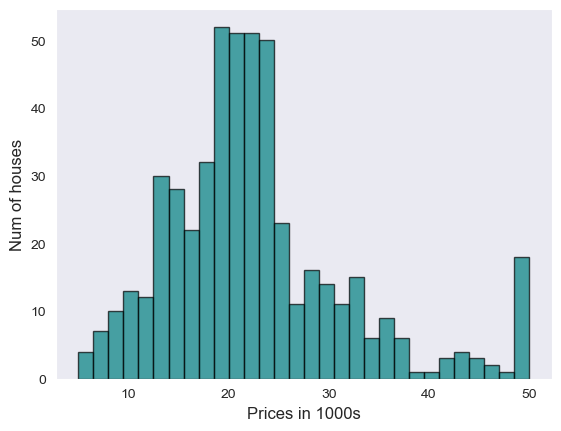

In [69]:
plt.Figure(figsize=(12,8))
plt.hist(data["PRICE"],bins=30, color = "teal", edgecolor="black", alpha=0.7 )
plt.xlabel("Prices in 1000s", fontsize = 12)
plt.ylabel("Num of houses",fontsize = 12)

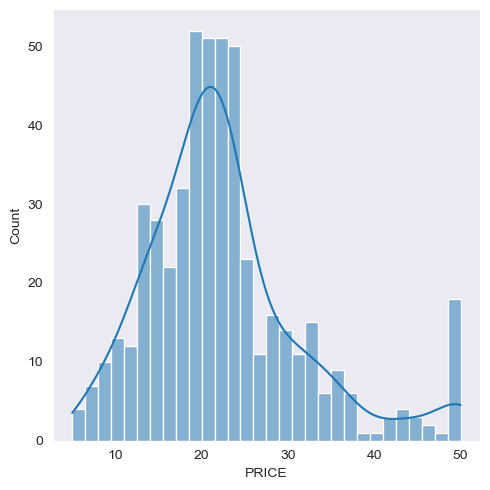

In [70]:
sb.displot(data.PRICE,bins=30,kde=True)
# sb.displot(data.PRICE)

In [71]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

Text(0, 0.5, 'Num of houses')

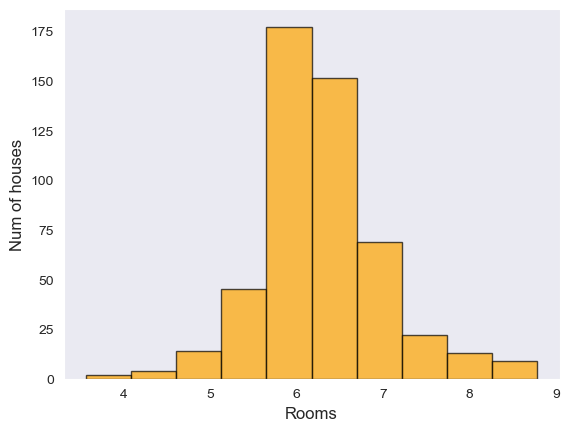

In [72]:
plt.Figure(figsize=(12,8))
plt.hist(data["RM"],bins=10, color = "orange", edgecolor="black", alpha=0.7 )
plt.xlabel("Rooms", fontsize = 12)
plt.ylabel("Num of houses",fontsize = 12)

Text(0, 0.5, 'Num of houses')

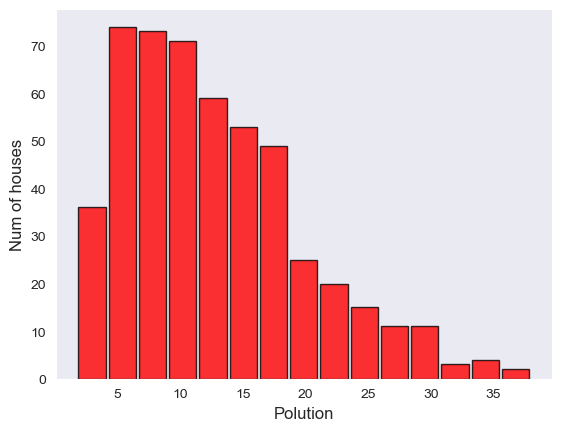

In [73]:
plt.Figure(figsize=(12,8))
plt.hist(data["LSTAT"],bins=15, color = "red", edgecolor="black", alpha=0.8 , rwidth=0.9)
plt.xlabel("Polution", fontsize = 12)
plt.ylabel("Num of houses",fontsize = 12)

In [74]:
data.RAD.value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

Text(0, 0.5, 'Num of houses')

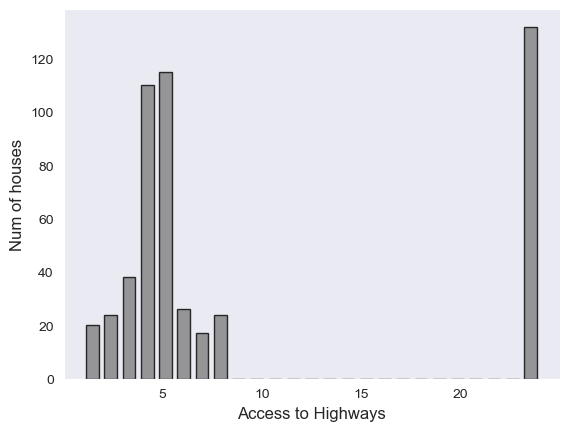

In [75]:
plt.Figure(figsize=(12,8))
# plt.hist(data["RAD"],bins=25, color = "grey", edgecolor="black", alpha=0.8 )
plt.hist(data["RAD"],bins=25, color = "grey", edgecolor="black", alpha=0.8, rwidth=0.7 )
plt.xlabel("Access to Highways", fontsize = 12)
plt.ylabel("Num of houses",fontsize = 12)

Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64', name='RAD')


Text(0, 0.5, 'Num of houses')

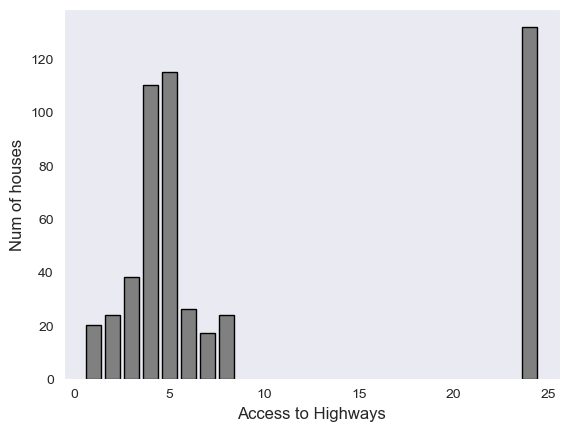

In [76]:
###flexible way of making these without hardcoding 

freq = data.RAD.value_counts()
print(freq.index)

plt.bar(freq.index, height = freq, color = "grey", edgecolor="black")
plt.xlabel("Access to Highways", fontsize = 12)
plt.ylabel("Num of houses",fontsize = 12)

In [77]:
data.CHAS.value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [78]:
[data.PRICE.min()]
[data.PRICE.max()]

[50.0]

In [79]:
data.min()    ## min value in every col 

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [80]:
for cols in data.columns:
    if cols != "PRICE":
        corr = data["PRICE"].corr(data[cols])
        print(f"Corr with {cols}:   {corr}")


Corr with CRIM:   -0.38830460858681143
Corr with ZN:   0.3604453424505435
Corr with INDUS:   -0.48372516002837357
Corr with CHAS:   0.1752601771902987
Corr with NOX:   -0.4273207723732826
Corr with RM:   0.6953599470715393
Corr with AGE:   -0.37695456500459623
Corr with DIS:   0.24992873408590394
Corr with RAD:   -0.3816262306397775
Corr with TAX:   -0.46853593356776685
Corr with PTRATIO:   -0.5077866855375616
Corr with B:   0.3334608196570666
Corr with LSTAT:   -0.7376627261740151


In [81]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [82]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
# triangle_indices

mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

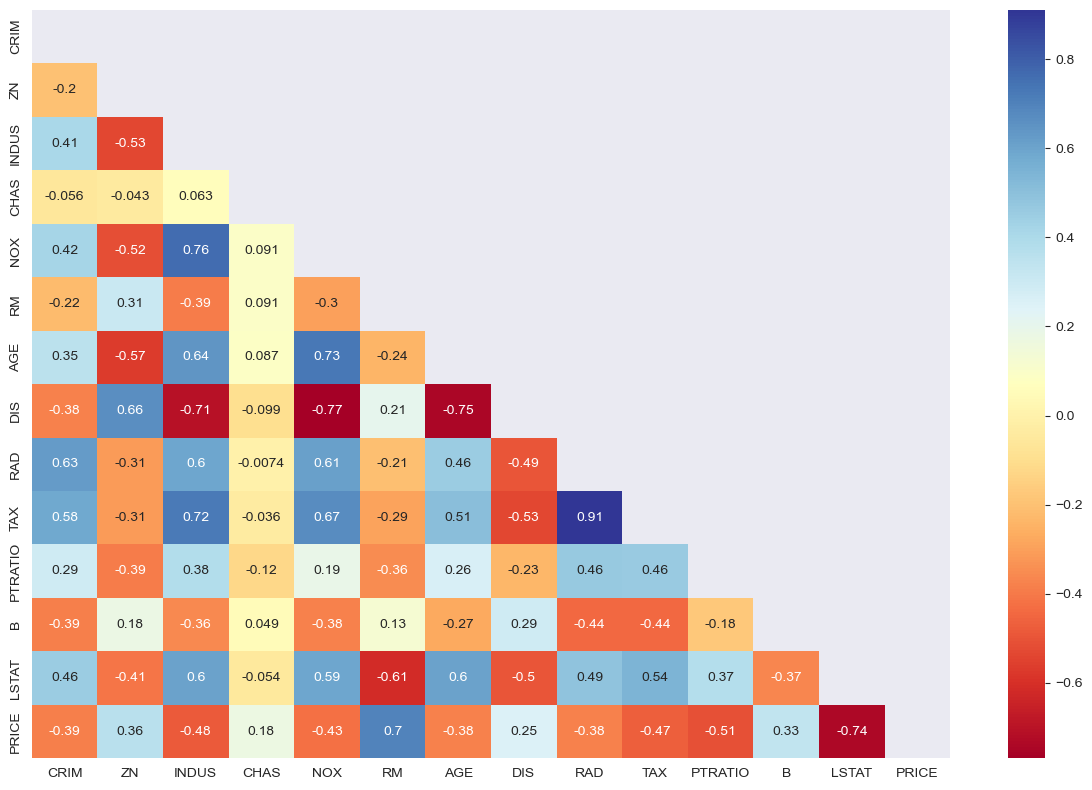

In [83]:
plt.figure(figsize=(12,8))
sb.heatmap(data.corr(), mask=mask, cmap= "RdYlBu" , annot=True)
sb.set_style("dark")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(basedir/"plots/corr_heatmap.png",dpi = 300,bbox_inches= "tight")
plt.show()

Text(0.5, 1.0, 'Distance vs NOX    (Corr -0.769)')

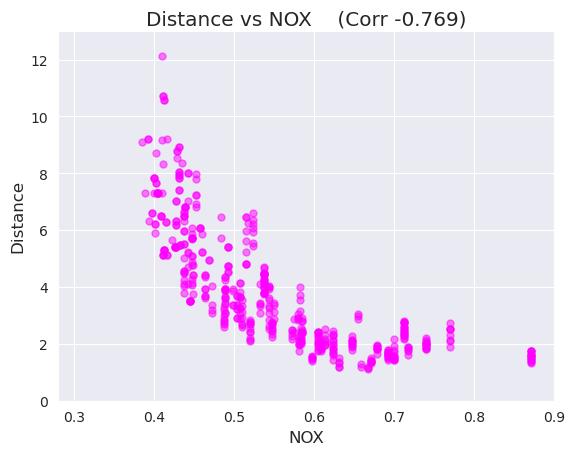

In [84]:
plt.scatter(data.NOX,data.DIS,color = "magenta" , alpha = 0.5 , s=25)
plt.xlabel("NOX",fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.grid()
plt.style.use("classic")
plt.xlim(0.28,0.9)
plt.ylim(0,13)
corr = data.NOX.corr(data.DIS).round(3)
plt.title(f"Distance vs NOX    (Corr {corr})")

<Figure size 1120x640 with 0 Axes>

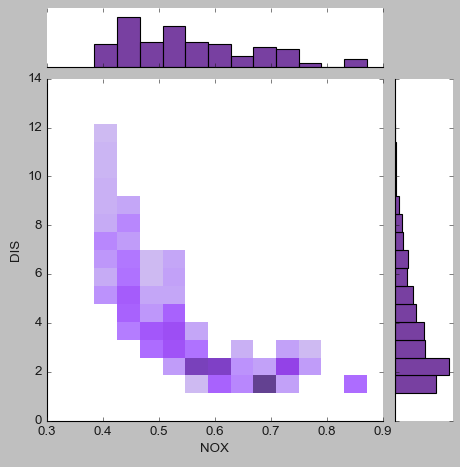

In [85]:
plt.figure(figsize=(14,8))
sb.jointplot(x = data.NOX,y =data.DIS, color = "indigo", kind=  "hist")
sb.set_style("darkgrid")
sb.set()


Text(0.5, 1.0, 'RAD vs TAX   (Corr 0.91)')

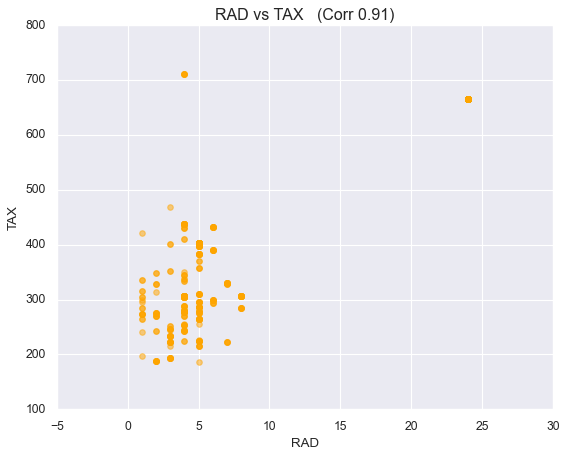

In [86]:
plt.scatter(data.RAD,data.TAX ,color = "orange" , alpha = 0.5 , s=25)
plt.ylabel("TAX",fontsize=12)
plt.xlabel("RAD", fontsize=12)
plt.grid(True)
plt.style.use("ggplot")

corr = data.TAX.corr(data.RAD).round(3)
plt.title(f"RAD vs TAX   (Corr {corr})")

<Figure size 1120x640 with 0 Axes>

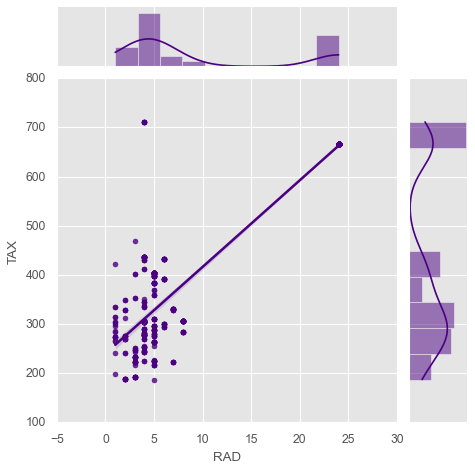

In [87]:
plt.figure(figsize=(14,8))
sb.jointplot(x = data.RAD,y =data.TAX, color = "indigo", kind=  "reg")
sb.set_style("darkgrid")

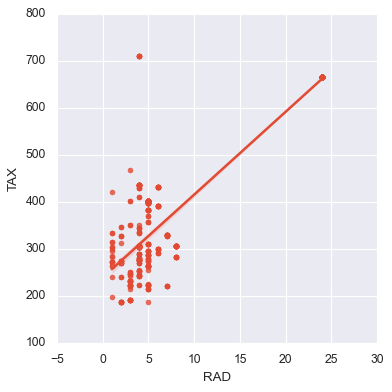

In [88]:
sb.lmplot(x='RAD' , y='TAX' ,data= data )
plt.grid(True)

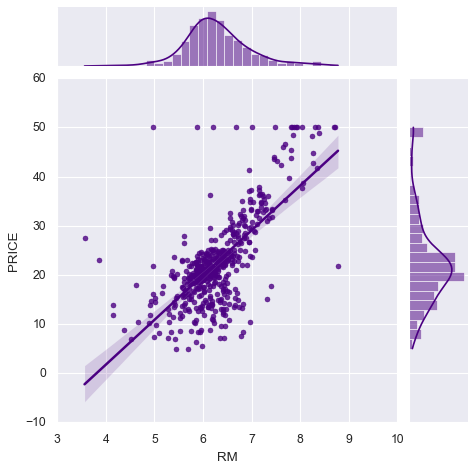

In [89]:

corr = data.PRICE.corr(data.RM).round(3)
sb.jointplot(x = data.RM,y =data.PRICE, color = "indigo", kind=  "reg")
sb.set_style("darkgrid")

In [90]:
# sb.lmplot(x='RM' , y='PRICE' ,data= data ,scatter_kws={'color': 'orange'},line_kws={'color': 'magenta'})
# plt.grid(True)

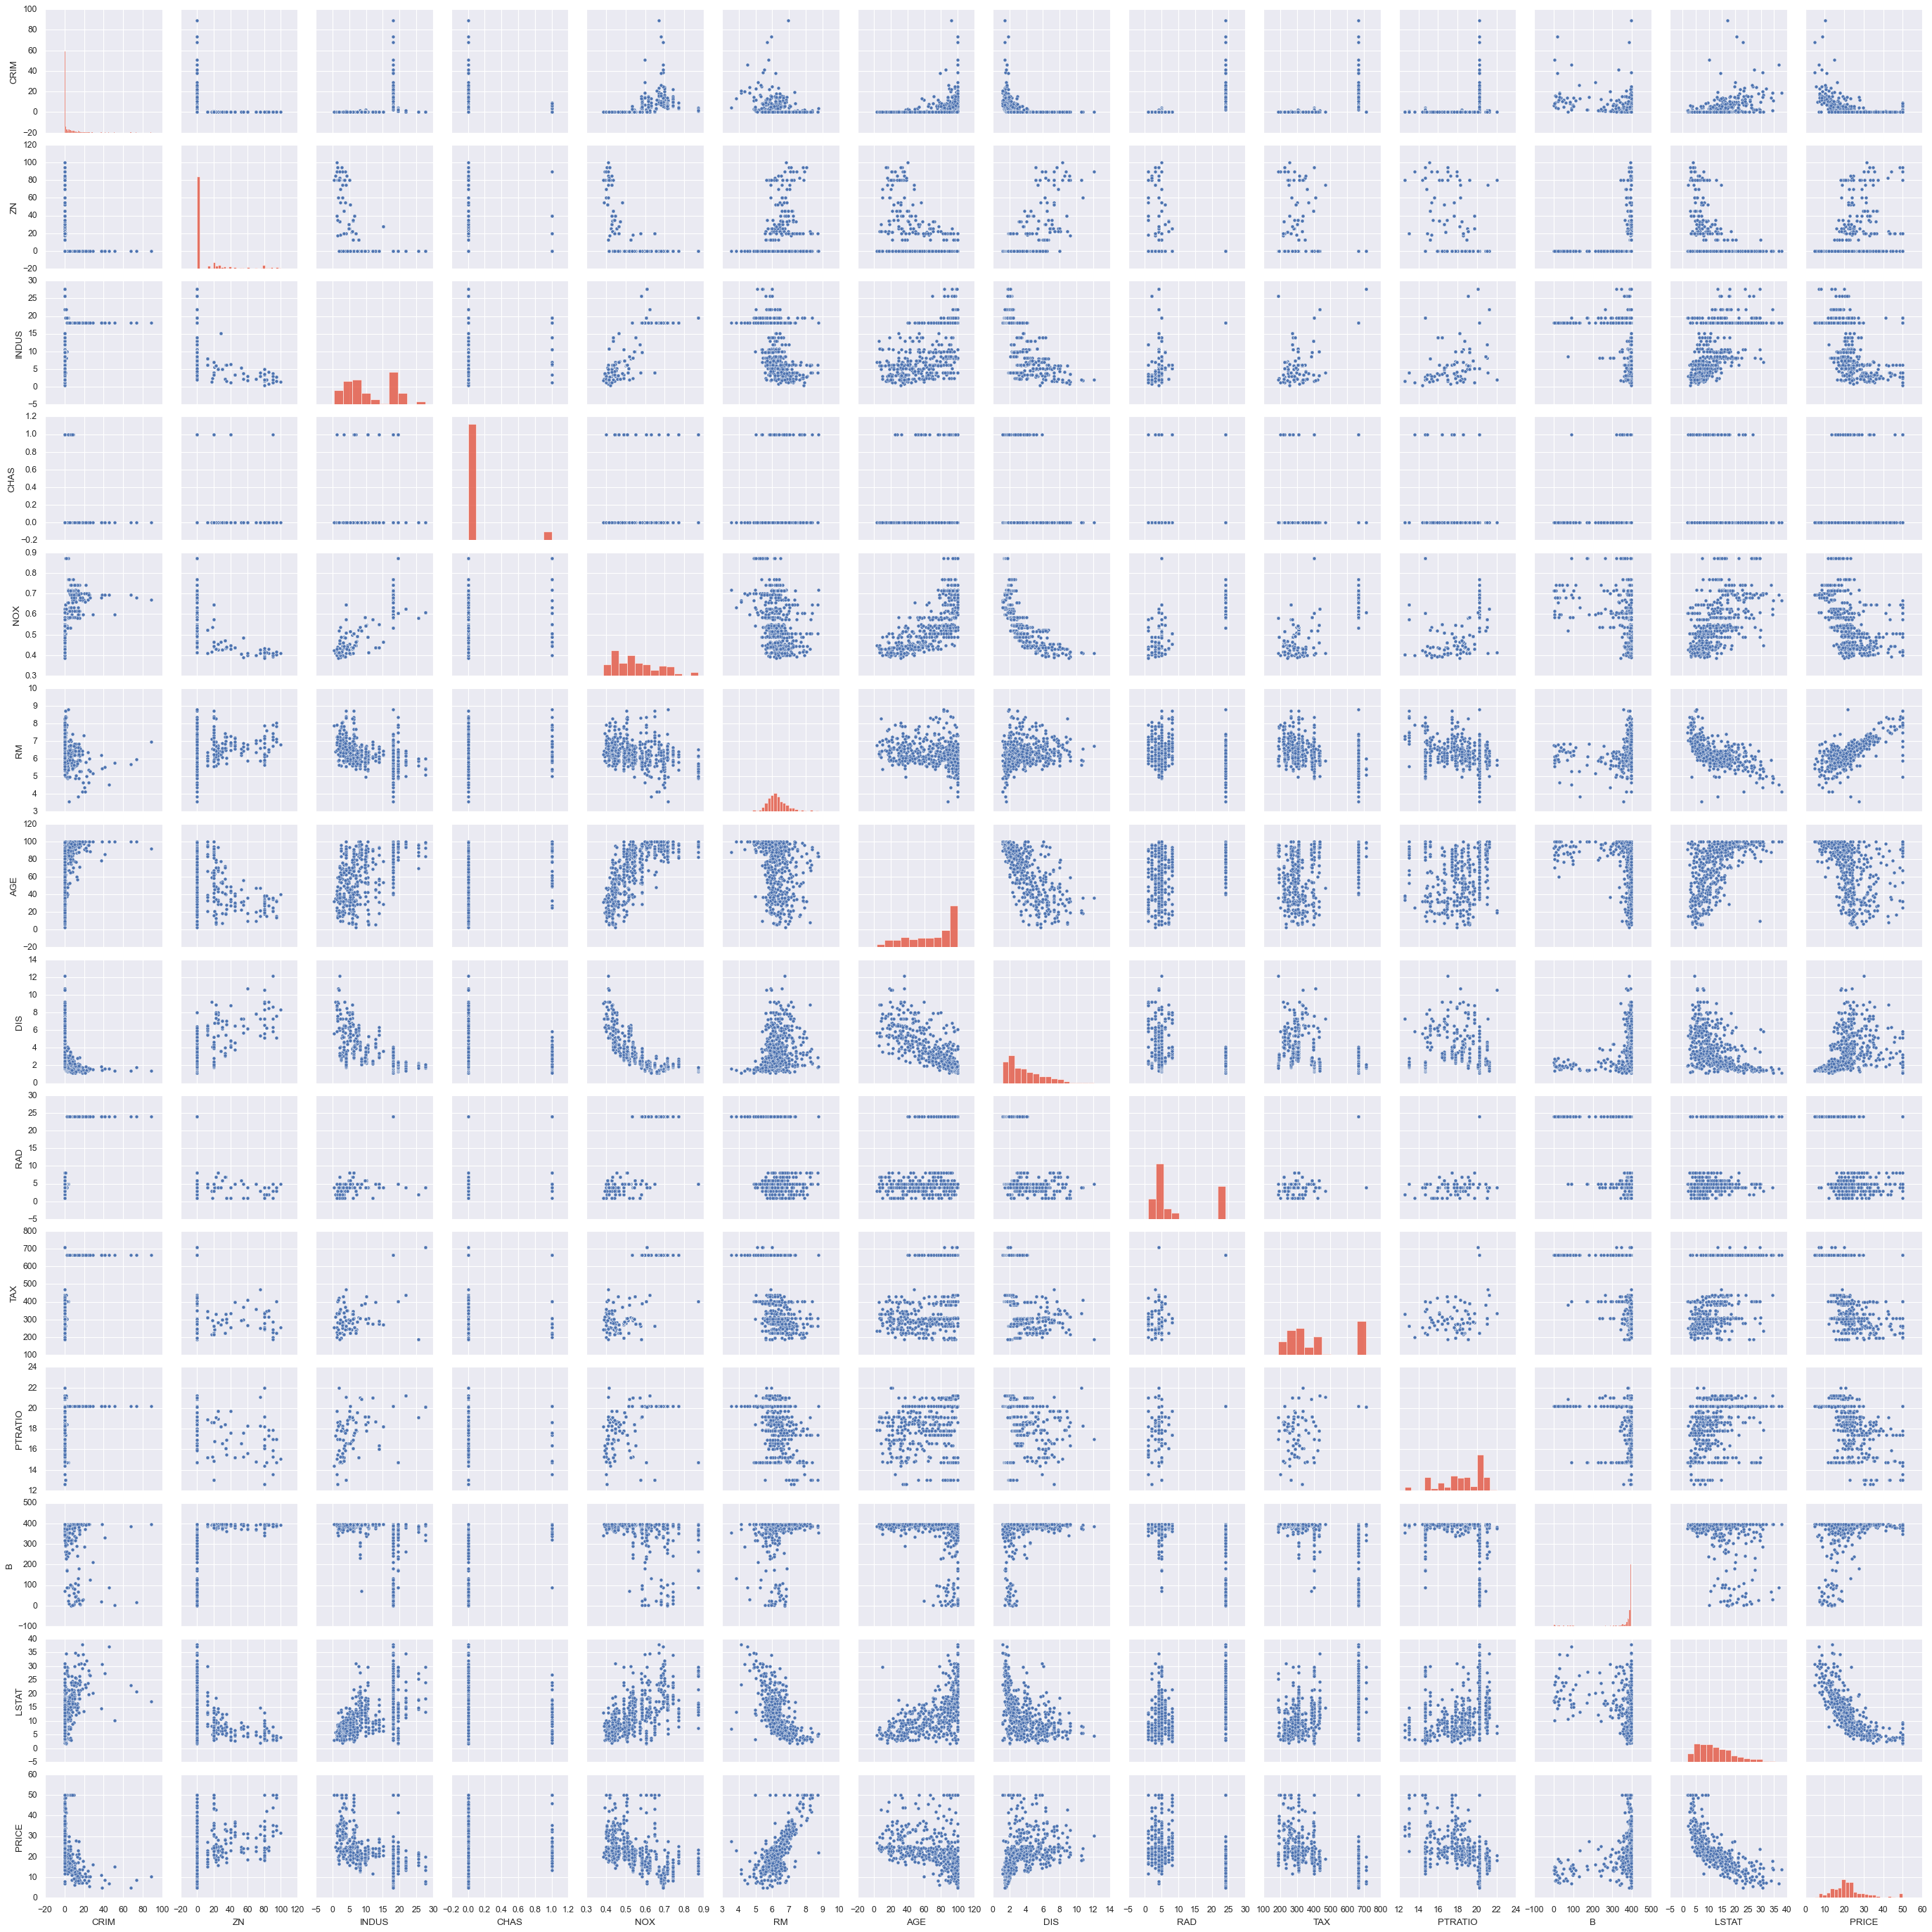

In [91]:
sb.pairplot(data)

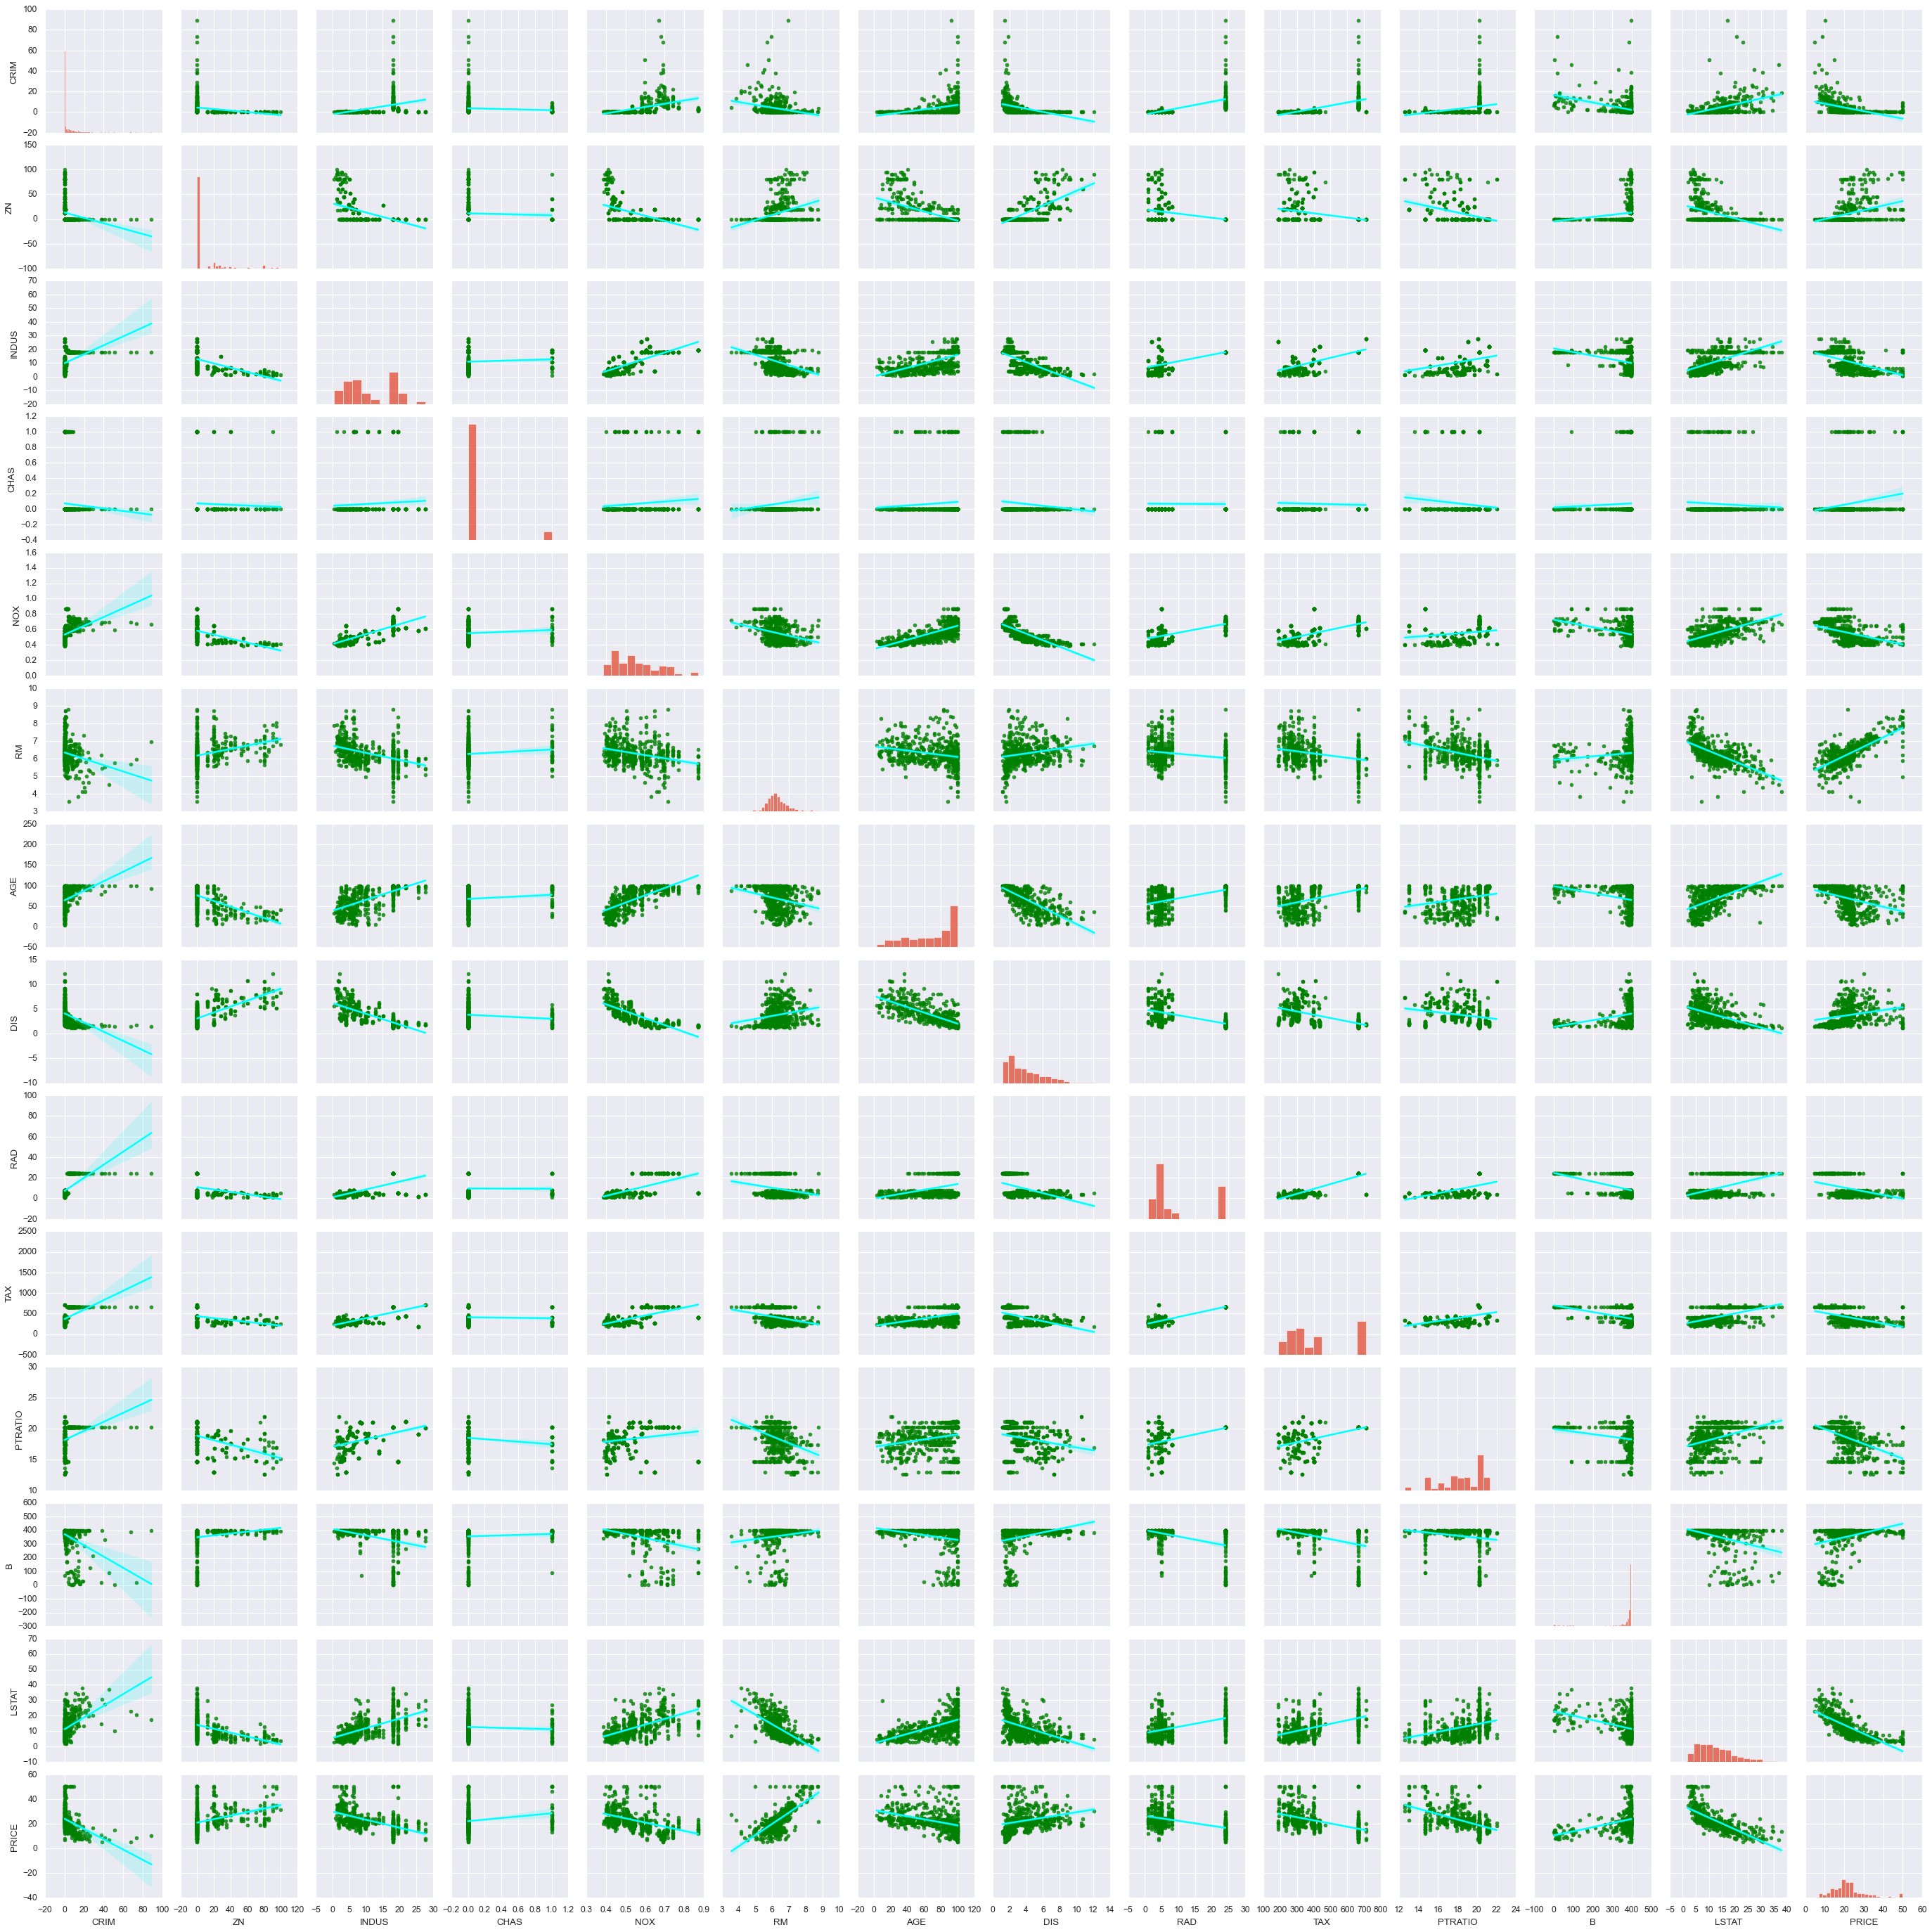

In [92]:
sb.pairplot(data, kind = "reg", plot_kws= {'line_kws':{'color':'cyan'}, 'scatter_kws':{'color':'green'}})

## Training and Test dataset

In [93]:
prices = data.PRICE

features = data.drop("PRICE", axis = 1)     #### to remove a col off 


In [94]:
arr = np.array([[1, 2], [3, 4]])
arr



array([[1, 2],
       [3, 4]])

# Multivariable  Regression

###### Value of intercept remains constant while $\theta_0$ changes 

$$
\hat{\text{Price}} = \theta_0 + \theta_1  \text{RM} + \theta_2  \text{NOX} + \cdots + \theta_n  N
$$


In [95]:


x_train,x_test,y_train,y_test = tts(features,prices,test_size=0.2,random_state=10)



In [96]:
regr = LR()
regr_test = LR()
regr.fit(x_train,y_train)


LinearRegression()

In [97]:
print(regr.intercept_)

trained_coef = pd.DataFrame(data = regr.coef_, index= x_train.columns , columns=["Coefficient"])

36.53305138282447


In [98]:
trained_coef

Coefficient
CRIM       -0.128181
ZN          0.063198
INDUS      -0.007576
CHAS        1.974515
NOX       -16.271989
RM          3.108456
AGE         0.016292
DIS        -1.483014
RAD         0.303988
TAX        -0.012082
PTRATIO    -0.820306
B           0.011419
LSTAT      -0.581626

In [99]:
r2_test = regr.score(x_test,y_test)
r2_train = regr.score(x_train,y_train)

print(f"R2 for test data: {regr.score(x_test,y_test)}")
print(f"R2 for trained data: {regr.score(x_train,y_train)}")

R2 for test data: 0.6709339839115636
R2 for trained data: 0.750121534530608


##### Data Transformation 

In [100]:
prices.skew() 

np.float64(1.1080984082549072)

In [101]:
prices_log = np.log(data.PRICE)
prices_log.skew()

np.float64(-0.33032129530987864)

Text(0.5, 1.0, 'Prices with log')

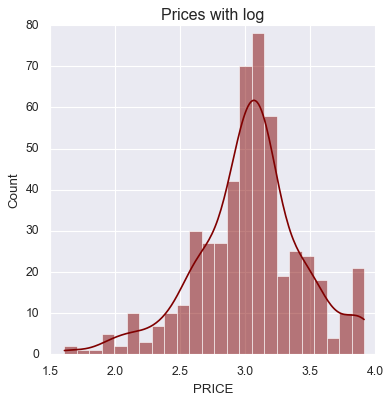

In [102]:
sb.displot(prices_log, color="maroon", kde=True)
plt.title("Prices with log")

## Regression using log 

In [103]:
prices_log = np.log(data.PRICE)
x_train,x_test,y_train,y_test= tts(features , prices_log, random_state=10, test_size= 0.2)
log_reg = LR()
log_reg.fit(x_train,y_train)

LinearRegression()

In [104]:
pd.DataFrame(columns=["Coeff"], data=log_reg.coef_, index=features.columns)

Coeff
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [105]:
print(f"Intercept : {log_reg.intercept_}")

Intercept : 4.059943871775207


In [106]:
print(f"R2 value of Trained set : {log_reg.score(x_train,y_train)}")
print(f"R2 value of Test set : {log_reg.score(x_test,y_test)}")

R2 value of Trained set : 0.7930234826697584
R2 value of Test set : 0.7446922306260739


### P values and evaluating Coeffs 

In [107]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
results = model.fit()

In [108]:
pd.DataFrame({"Coef":results.params, "Pvalues":round(results.pvalues,3)})

Coef  Pvalues
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

In [109]:
results.rsquared

np.float64(0.7930234826697584)

### Testing for Multicollinearity

###### VIF (Variance Inflation Factor) measures how much a predictor (independent variable) is correlated with the other predictors in a regression model.

Over 10 is bad

In [110]:
# VIF = vif(exog = x_incl_const.values ,exog_idx=13 )
# VIF
vif_list  = []
for i in range(1,len(x_incl_const.columns)):
    VIF =  vif(exog= x_incl_const.values,exog_idx= i )
    vif_list.append(VIF)
vif_list    

[np.float64(1.714525044393249),
 np.float64(2.3328224265597597),
 np.float64(3.943448822674638),
 np.float64(1.0788133385000576),
 np.float64(4.410320817897634),
 np.float64(1.8404053075678568),
 np.float64(3.3267660823099394),
 np.float64(4.222923410477865),
 np.float64(7.314299817005058),
 np.float64(8.508856493040817),
 np.float64(1.8399116326514058),
 np.float64(1.338671325536472),
 np.float64(2.812544292793035)]

In [111]:
type(x_incl_const)
type(x_incl_const.values)

numpy.ndarray

In [112]:
len(x_incl_const.columns)

14

In [113]:
vif_list  = [ vif(exog= x_incl_const.values,exog_idx= i) for i in range(1,len(x_incl_const.columns) ) ]
vif_list

[np.float64(1.714525044393249),
 np.float64(2.3328224265597597),
 np.float64(3.943448822674638),
 np.float64(1.0788133385000576),
 np.float64(4.410320817897634),
 np.float64(1.8404053075678568),
 np.float64(3.3267660823099394),
 np.float64(4.222923410477865),
 np.float64(7.314299817005058),
 np.float64(8.508856493040817),
 np.float64(1.8399116326514058),
 np.float64(1.338671325536472),
 np.float64(2.812544292793035)]

In [114]:
pd.DataFrame({"coef_name": features.columns,"VIF":vif_list} )

coef_name       VIF
0       CRIM  1.714525
1         ZN  2.332822
2      INDUS  3.943449
3       CHAS  1.078813
4        NOX  4.410321
5         RM  1.840405
6        AGE  3.326766
7        DIS  4.222923
8        RAD  7.314300
9        TAX  8.508856
10   PTRATIO  1.839912
11         B  1.338671
12     LSTAT  2.812544

### BAYESIAN INFORMATION CRITERION & MODEL SIMPLFICATION   

lower the better 

In [115]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Thu, 24 Jul 2025   Prob (F-statistic):          1.70e-124
Time:                        20:58:57   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.000       3.614       4.506
CRIM          -0.0107      0.001     -7.971      0.000      -0.013      -0.008
ZN             0.0016      0.001      2.641      0.009       0.000       0.003
INDUS          0.0020      0.003      0.765      0.445      -0.003       0.007
CHAS           0.0803      0.039      2.079      0.038       0.004       0.156
NOX           -0.7041      0.166     -4.245      0.000      -1.030      -0.378
RM             0.0734      0.019      3.910      0.000       0.036       0.110
AGE            0.0008      0.001      1.258      0.209      -0.000       0.002
DIS           -0.0476      0.009     -5.313      0.000      -0.065      -0.030
RAD            0.0146      0.003      5.170      0.000       0.009       0.020
TAX           -0.0006      0.000     -4.095      0.000      -0.001      -0.000
PTRATIO       -0.0348      0.006     -5.908      0.000      -0.046      -0.023
B              0.0005      0.000      4.578      0.000       0.000       0.001
LSTAT         -0.0314      0.002    -14.213      0.000      -0.036      -0.027
==============================================================================
Omnibus:                       28.711   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.952
Skew:                           0.093   Prob(JB):                     9.84e-24
Kurtosis:                       5.502   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
##Model 1 

x_incl_const = sm.add_constant(x_train)
model_1 = sm.OLS(y_train,x_incl_const)
result_1 = model_1.fit()
model_1 = pd.DataFrame({"Coef":result_1.params, "Pvalues":round(result_1.pvalues,3)})
print(f"BIC: {round(result_1.bic,3)}") 
print(f"Rsquared : {round(result_1.rsquared,3)}") 

BIC: -139.75
Rsquared : 0.793


In [117]:
#Model 2 without INDUS

x_incl_const = sm.add_constant(x_train)
x_incl_const =x_incl_const.drop(["INDUS"],axis=1)
model_2 = sm.OLS(y_train,x_incl_const)
result_2 = model_2.fit()
model_2 = pd.DataFrame({"Coef":result_2.params, "Pvalues":round(result_2.pvalues,3)})
print(f"BIC: {round(result_2.bic,3)}") 
print(f"Rsquared : {round(result_2.rsquared,3)}") 

BIC: -145.145
Rsquared : 0.793


In [118]:
#Model 3 without INDUS & AGE
x_incl_const = sm.add_constant(x_train)
x_incl_const =x_incl_const.drop(["INDUS","AGE"],axis=1)
model_3 = sm.OLS(y_train,x_incl_const)
result_3 = model_3.fit()
model_3 = pd.DataFrame({"Coef":result_3.params, "Pvalues":round(result_3.pvalues,3)})
print(f"BIC: {round(result_3.bic,3)}") 
print(f"Rsquared : {round(result_3.rsquared,3)}") 

BIC: -149.499
Rsquared : 0.792


In [119]:
models_list = [model_1,model_2,model_3]
pd.concat(models_list, axis = 1)

Coef  Pvalues      Coef  Pvalues      Coef  Pvalues
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residuals and plots


In [120]:
### Latest model
prices_log = np.log(data.PRICE)

# features = features.drop(["AGE","INDUS"], axis = 1)
x_train,x_test,y_train,y_test= tts(features , prices_log, random_state=10, test_size= 0.2)
log_reg = LR()
log_reg.fit(x_train,y_train)
x_incl_const = sm.add_constant(x_train)

# x_incl_const =x_incl_const.drop(["INDUS","AGE"],axis=1)
model_x = sm.OLS(y_train,x_incl_const)
result_x = model_x.fit()
model_x = pd.DataFrame({"Coef":result_x.params, "Pvalues":round(result_x.pvalues,3)})
print(f"BIC: {round(result_x.bic,3)}") 
print(f"Rsquared : {round(result_x.rsquared,3)}") 

BIC: -139.75
Rsquared : 0.793


In [121]:
# residuals = y_train - result_x.fittedvalues   ##fitted values r predicted y
residuals = result_x.resid
residuals.describe()

count    4.040000e+02
mean     3.084441e-15
std      1.836649e-01
min     -7.337682e-01
25%     -9.957860e-02
50%     -1.176256e-02
75%      9.897931e-02
max      7.743173e-01
dtype: float64

In [122]:
residuals = result_x.resid

In [123]:
corr = (round(y_train.corr(result_x.fittedvalues) ,3)) ## correlation btw original y values vs predicted y
corr

np.float64(0.891)

(1.5, 4.1)

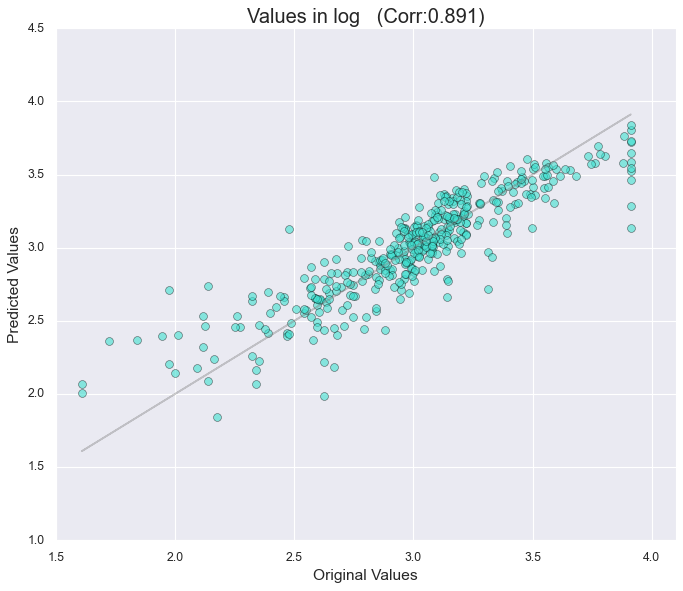

In [124]:
plt.figure(figsize=(10,8))
plt.scatter(y_train, result_x.fittedvalues, s = 50, color = "turquoise", edgecolors="black", alpha = 0.6)
plt.plot(y_train, y_train, color = "grey" , alpha = 0.4)
plt.xlabel("Original Values",fontsize=14)
plt.ylabel("Predicted Values",fontsize=14)
plt.title(f"Values in log   (Corr:{corr})",fontsize=18)
plt.grid(True)
plt.xlim(1.5,4.1)

(2.0, 52.0)

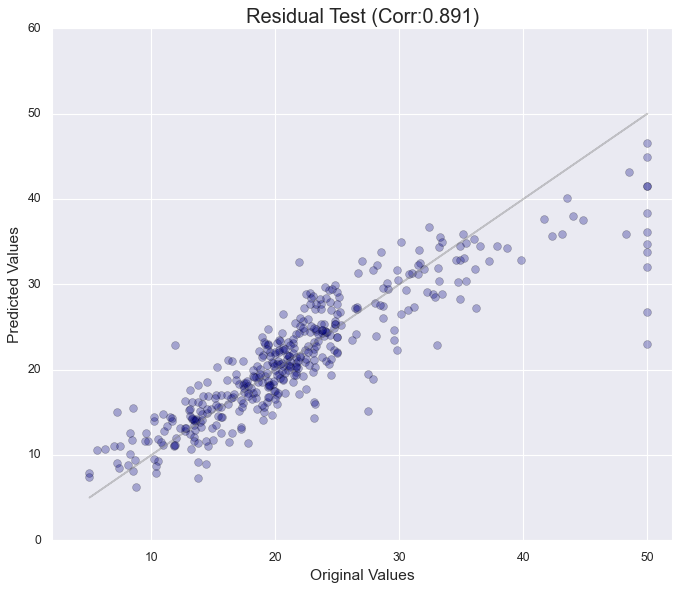

In [125]:

plt.figure(figsize=(10,8))
plt.scatter(np.e**y_train, np.e**result_x.fittedvalues, s = 50, color = "navy", edgecolors="black", alpha = 0.3)
plt.plot(np.e**y_train, np.e**y_train, color = "grey" , alpha = 0.4)
plt.xlabel("Original Values",fontsize=14)
plt.ylabel("Predicted Values",fontsize=14)
plt.title(f"Residual Test (Corr:{corr})",fontsize=18)
plt.grid(True)
plt.xlim(2,52)

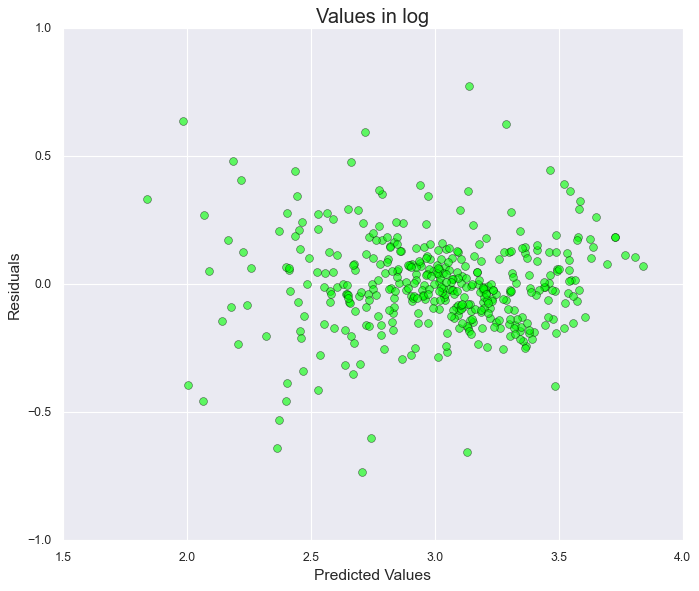

In [126]:

plt.figure(figsize=(10,8))
plt.scatter(result_x.fittedvalues,result_x.resid, s = 50, color = "lime", edgecolors="black", alpha = 0.6)
# plt.plot(y_train, y_train, color = "grey" , alpha = 0.6)
plt.ylabel("Residuals",fontsize=14)
plt.xlabel("Predicted Values",fontsize=14)
plt.title(f"Values in log",fontsize=18)
plt.grid(True)
plt.savefig(basedir/"plots"/"residual_v_predictions_log.png",dpi = 300,bbox_inches= "tight")

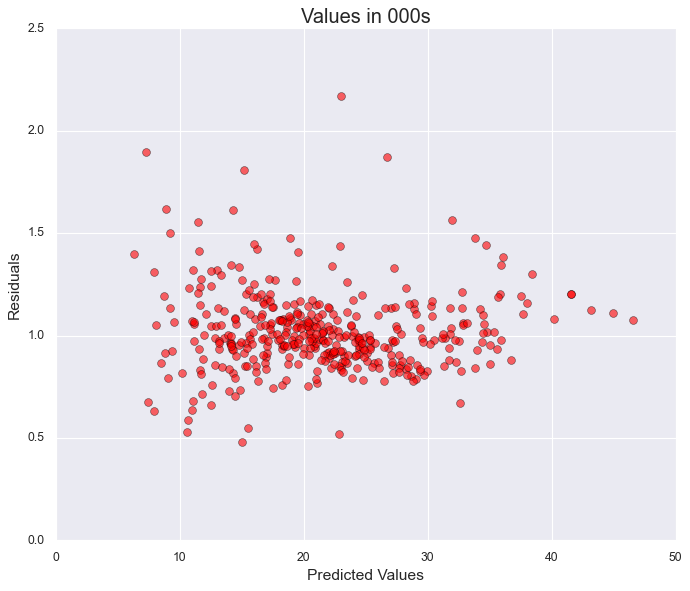

In [127]:

plt.figure(figsize=(10,8))
plt.scatter(np.e**result_x.fittedvalues,np.e**result_x.resid, s = 50, color = "red", edgecolors="black", alpha = 0.6)
plt.ylabel("Residuals",fontsize=14)
plt.xlabel("Predicted Values",fontsize=14)
plt.title(f"Values in 000s",fontsize=18)
plt.grid(True)
plt.savefig(basedir/"plots"/"residual_v_predictions.png",dpi = 300,bbox_inches= "tight")

In [128]:
residual_mean = round(result_x.resid.mean(),2)
residual_skew = round(result_x.resid.skew(),2)

Text(0.5, 6.444444444444427, 'Residual')

<Figure size 1120x640 with 0 Axes>

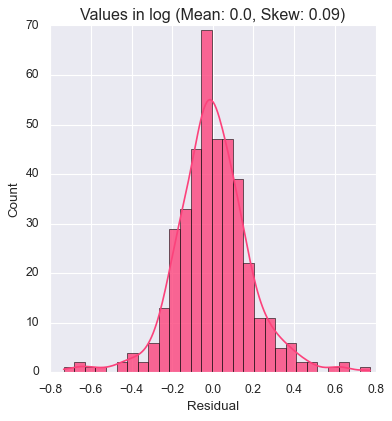

In [129]:
plt.figure(figsize=(14,8))
sb.displot(result_x.resid, kde=True , color = "#FC427B" , alpha =0.8, edgecolor="black")
plt.title(f"Values in log (Mean: {residual_mean}, Skew: {residual_skew})")
plt.xlabel("Residual")

In [130]:
result_x.mse_resid

np.float64(0.03485723579671048)

In [131]:
### IF WE SQRT THE MSE , RMSE = STANDARD DEVIATION AND 95% VALUES FALL BTW +-2 SD , 67% +- 1SD


print("1SE in log prices", np.sqrt(result_x.mse_resid))
print("2SE in log prices", 2* np.sqrt(result_x.mse_resid))

upper_bound = np.log(30) + 2* np.sqrt(results.mse_resid)
lower_bound = np.log(30) - 2* np.sqrt(results.mse_resid)

print("The upper bound in log prices for 95% prediction interval is ", upper_bound)
print("The upper bound in normal prices  ", np.e** upper_bound *1000)
print("The lower bound in log prices for 95% prediction interval is ", lower_bound)
print("The lower bound in normal prices  ", np.e** lower_bound * 1000)

1SE in log prices 0.18670092607352134
2SE in log prices 0.3734018521470427
The upper bound in log prices for 95% prediction interval is  3.774599233809198
The upper bound in normal prices   43580.03940909473
The lower bound in log prices for 95% prediction interval is  3.027795529515113
The lower bound in normal prices   20651.656405160997
